<a href="https://colab.research.google.com/github/sbmshukla/learning-ml-projects/blob/main/Binary_Classification_with_a_Bank_Dataset_Submit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
bdf_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Binary Classification with a Bank Dataset  Submit Prediction/train.csv')
bdf_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Binary Classification with a Bank Dataset  Submit Prediction/test.csv')

In [ ]:
bdf_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [ ]:
bdf_train.drop(['id'], axis=1, inplace=True)

**EDA**

In [ ]:
bdf_train.shape

(750000, 17)

In [ ]:
bdf_train.drop_duplicates(inplace=True)

In [ ]:
bdf_train.shape

(750000, 17)

In [ ]:
bdf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 97.3+ MB


In [ ]:
bdf_train.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [ ]:
bdf_train.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,175541,480759,401683,737151,411288,645023,486655,228411,672450


<Axes: xlabel='y'>

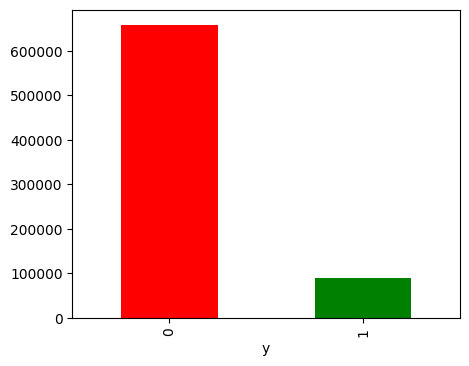

In [ ]:
plt.figure(figsize=(5, 4))
bdf_train['y'].value_counts().plot(kind='bar', color=['red', 'green'])

<Axes: >

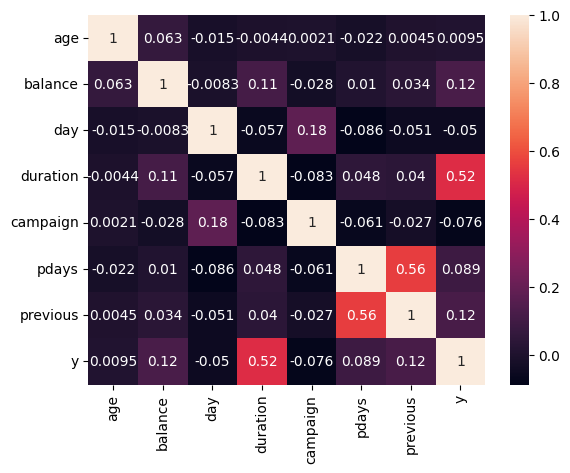

In [ ]:
sns.heatmap(bdf_train.corr(numeric_only=True), annot=True)

In [ ]:
bdf_train.groupby('job')['y'].mean()

,y
job,
admin.,0.116453
blue-collar,0.067438
entrepreneur,0.081386
housemaid,0.084653
management,0.150392
retired,0.246241
self-employed,0.129443
services,0.082714
student,0.340784


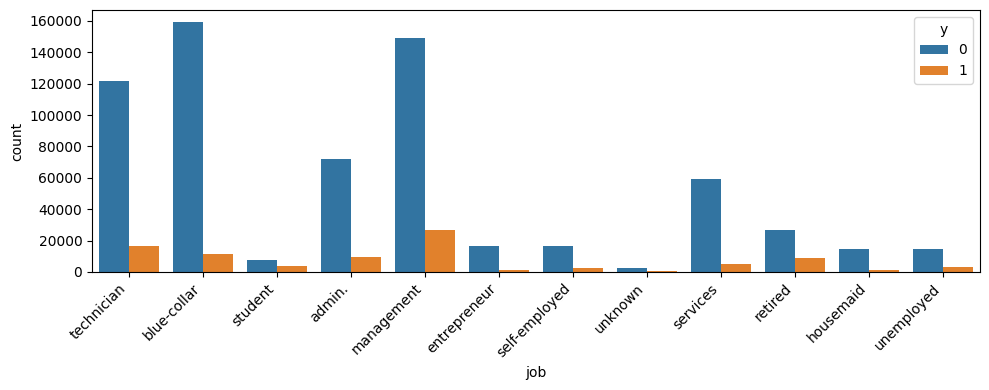

In [ ]:
plt.figure(figsize=(10, 4)) # Increased figure size for better readability
sns.countplot(data=bdf_train, x='job', hue='y')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
bdf_train.groupby('marital')['y'].mean()

,y
marital,
divorced,0.111576
married,0.101872
single,0.170453


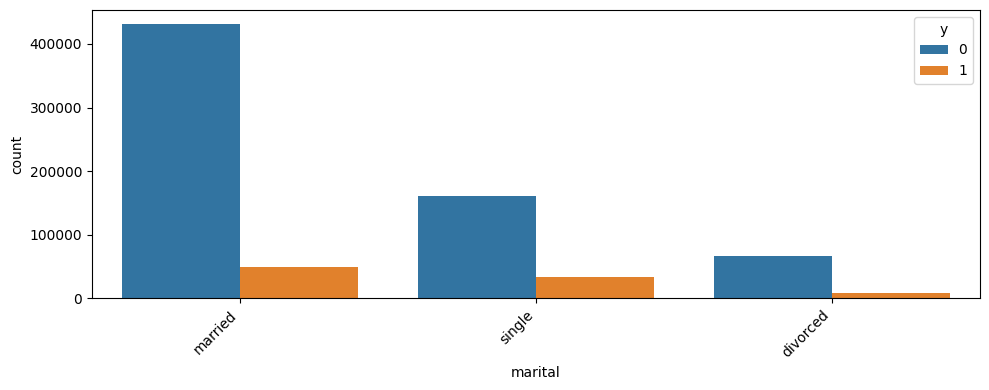

In [ ]:
plt.figure(figsize=(10, 4)) # Increased figure size for better readability
sns.countplot(data=bdf_train, x='marital', hue='y')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
bdf_train.groupby('education')['y'].mean()

,y
education,
primary,0.083097
secondary,0.105491
tertiary,0.162649
unknown,0.133387


In [ ]:
bdf_train.groupby('default')['y'].mean()

,y
default,
no,0.121947
yes,0.046307


In [ ]:
bdf_train.groupby('housing')['y'].mean()

,y
housing,
no,0.175778
yes,0.075251


In [ ]:
bdf_train.groupby('loan')['y'].mean()

,y
loan,
no,0.131378
yes,0.054736


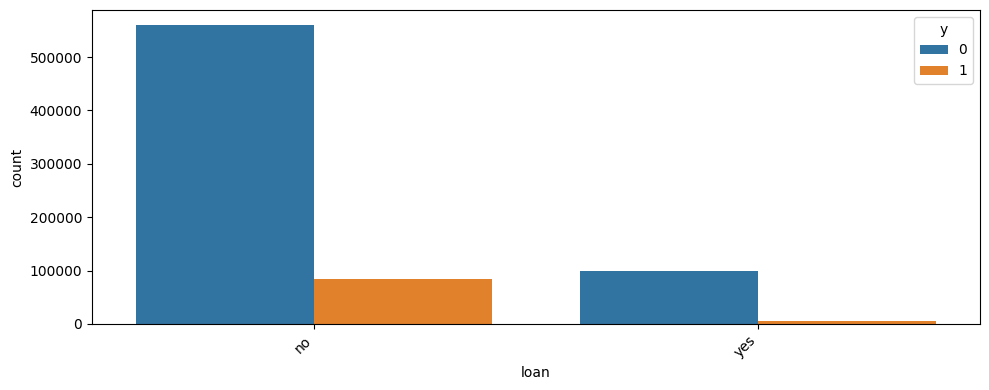

In [ ]:
plt.figure(figsize=(10, 4)) # Increased figure size for better readability
sns.countplot(data=bdf_train, x='loan', hue='y')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
bdf_train.groupby('poutcome')['y'].mean()

,y
poutcome,
failure,0.132794
other,0.166848
success,0.764004
unknown,0.101898


In [ ]:
bdf_train.groupby('contact')['y'].mean()

,y
contact,
cellular,0.156579
telephone,0.136799
unknown,0.042953


In [ ]:
df_summary = (
    bdf_train
    .groupby('month')
    .agg(
        mean_y=('y', 'mean'),     # Mean target value
        freq=('y', 'count')       # Frequency
    )
    .sort_values('mean_y', ascending=False)  # Sort by mean_y
    .reset_index()
)

print(df_summary)

   month    mean_y    freq
0    mar  0.571355    5802
1    sep  0.534755    7409
2    dec  0.513291    2069
3    oct  0.490004    9204
4    apr  0.235654   41319
5    feb  0.206801   37611
6    jan  0.124148   18937
7    aug  0.112161  128859
8    nov  0.109806   66062
9    jun  0.103726   93670
10   jul  0.090847  110647
11   may  0.071354  228411


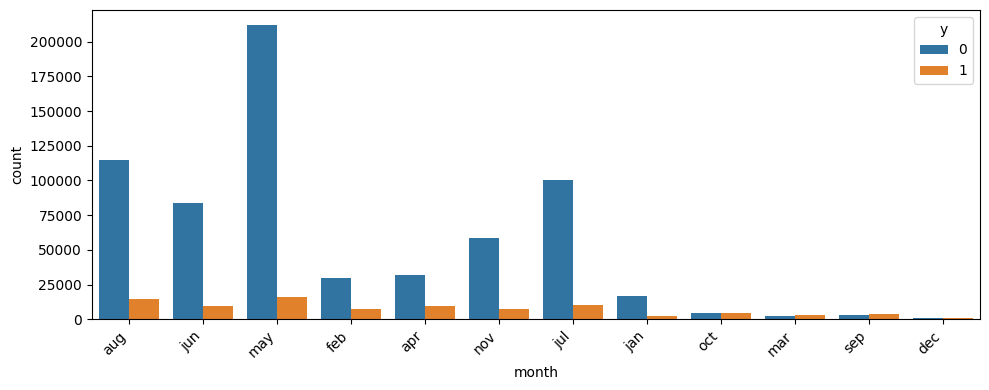

In [ ]:
plt.figure(figsize=(10, 4)) # Increased figure size for better readability
sns.countplot(data=bdf_train, x='month', hue='y')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
bdf_train.groupby('poutcome')['y'].mean()

,y
poutcome,
failure,0.132794
other,0.166848
success,0.764004
unknown,0.101898


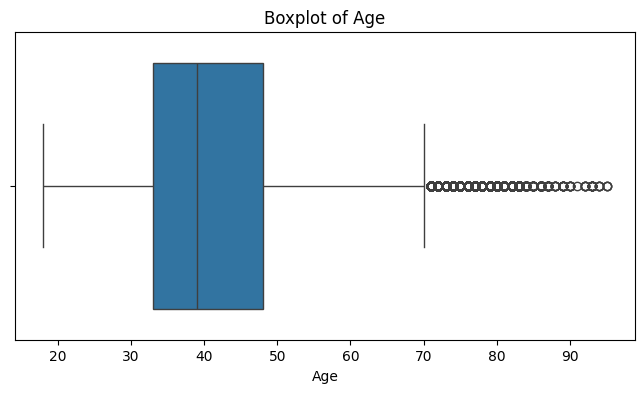

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=bdf_train['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
# Create age bins
age_bins = pd.cut(bdf_train['age'], bins=10)

bdf_train.groupby(age_bins)['y'].mean()

,y
age,
"(17.923, 25.7]",0.269158
"(25.7, 33.4]",0.138141
"(33.4, 41.1]",0.102672
"(41.1, 48.8]",0.091336
"(48.8, 56.5]",0.089007
"(56.5, 64.2]",0.163938
"(64.2, 71.9]",0.517120
"(71.9, 79.6]",0.532031
"(79.6, 87.3]",0.496809


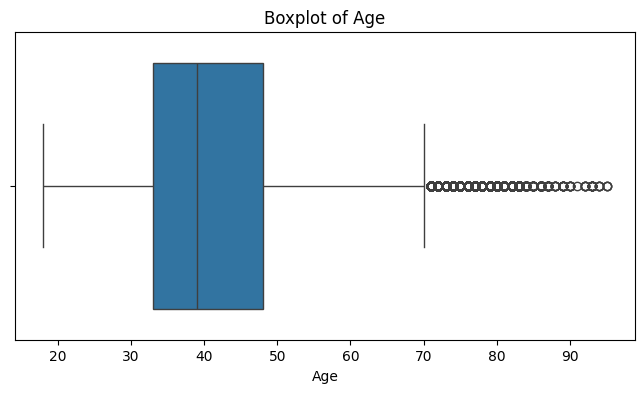

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=bdf_train['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

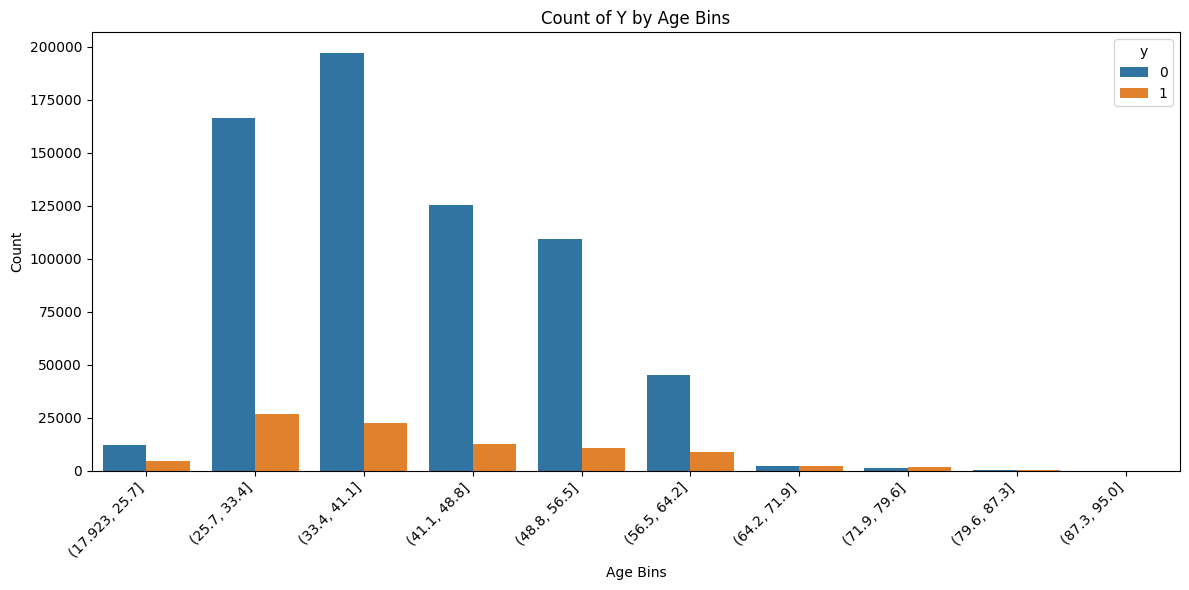

In [ ]:
# Create age bins
bdf_train['age_bins'] = pd.cut(bdf_train['age'], bins=10)

plt.figure(figsize=(12, 6))
sns.countplot(data=bdf_train, x='age_bins', hue='y')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Y by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
bdf_train['age_bins'].value_counts()

,count
age_bins,
"(33.4, 41.1]",219554
"(25.7, 33.4]",192962
"(41.1, 48.8]",137887
"(48.8, 56.5]",119935
"(56.5, 64.2]",53874
"(17.923, 25.7]",16860
"(64.2, 71.9]",4819
"(71.9, 79.6]",3122
"(79.6, 87.3]",940


In [ ]:
bdf_train.drop('age_bins', axis=1, inplace=True)

In [ ]:
# Lets Train Model Without Ebtracting Any Features

In [ ]:
X = bdf_train.drop('y', axis=1)
y = bdf_train['y']

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown


In [ ]:
ohe_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
ord_cols = ['education']

ord_cols_order = [['unknown', 'primary','secondary', 'tertiary']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from math import remainder
preeprocesing = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols)
    ],remainder='passthrough' ))
])

In [ ]:
# Parameter grid
param_grid_rfc = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
# Stratified K-Fold (preserves imbalance ratio)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with 5-fold CV
grid_search_for_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid_rfc,
    scoring='f1_macro',   # Better than accuracy for imbalanced data
    cv=cv_strategy,
    n_jobs=-1,
    verbose=2
)

In [ ]:
pipe = Pipeline(
    [
        ('preeprocesing', preeprocesing),
        ('classifier', grid_search_for_rfc)
    ]
)

pipe.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [ ]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
submission = pd.DataFrame({
    'id': bdf_test['id'],
    'y': pipe.predict(bdf_test.drop(columns=['id']))
})

submission.to_csv('submission_randomforest_nohyperparameter_2025-08-11_10-30-00.csv', index=False)

In [ ]:
pipe = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', LogisticRegression(class_weight ='balanced'))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(),
                                                                   ['education'])]))])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91    217507
           1       0.44      0.85      0.59     29993

    accuracy                           0.85    247500
   macro avg       0.71      0.85      0.75    247500
weighted avg       0.91      0.85      0.87    247500



In [ ]:
y_final_pred = pipe.predict(bdf_test.drop(columns=['id']))

submission_lr = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_lr.to_csv('sub_base_data_logistic.csv', index=False)

---
---
---

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# LightGBM classifier
lgbm_clf = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    n_estimators=500,
    random_state=42,
    verbose=-1
)

# Pipeline
pipe_lgbm = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', lgbm_clf)
])

scale_pos_weight: 7.31


In [ ]:
# Fit
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(),
                                                                   ['education'])]))])),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.306471609223903),
                                verbose=-1))])

In [ ]:
y_pred = pipe_lgbm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    217507
           1       0.55      0.92      0.69     29993

    accuracy                           0.90    247500
   macro avg       0.77      0.91      0.81    247500
weighted avg       0.93      0.90      0.91    247500



In [ ]:
y_final_pred = pipe_lgbm.predict(bdf_test.drop(columns=['id']))

submission_lgbm = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_lgbm.to_csv('sub_base_data_lgbm.csv', index=False)

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Pipeline
pipe_lgbm = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    random_state=42,
    verbose=-1
))])

scale_pos_weight: 7.31


In [ ]:
# Parameter grid (keep small for large dataset)
param_grid = {
    'classifier__n_estimators': [200, 500],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.05, 0.1]
}

# Stratified KFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search = GridSearchCV(
    pipe_lgbm,
    param_grid,
    cv=cv,
    scoring='f1',   # Better for imbalance
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preeprocesing',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('onehot',
                                                                                          OneHotEncoder(drop='first'),
                                                                                          ['job',
                                                                                           'marital',
                                                                                           'default',
                                                                                           'housing',
                                                                                           'loan',
                                                                                           'contact',
                                                                                           'month',
                                                                                           'poutcome']),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(),
                                                                                          ['education'])]))])),
                                       ('classifier',
                                        LGBMClassifier(min_child_samples=50,
                                                       num_leaves=64,
                                                       objective='binary',
                                                       random_state=42,
                                                       scale_pos_weight=np.float64(7.306471609223903),
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [-1, 10, 20],
                         'classifier__n_estimators': [200, 500]},
             scoring='f1', verbose=2)

In [ ]:
# Best results
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__n_estimators': 500}
Best F1 Score: 0.6836583667661897


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    217507
           1       0.55      0.92      0.69     29993

    accuracy                           0.90    247500
   macro avg       0.77      0.91      0.81    247500
weighted avg       0.93      0.90      0.91    247500



In [ ]:
y_final_pred = grid_search.predict(bdf_test.drop(columns=['id']))

submission_lgbm_grid = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_lgbm_grid.to_csv('sub_base_data_lgbm_grid2.csv', index=False)

In [ ]:
# Before Use Stacking Lets Get Best Para For XGB

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Pipeline
pipe_xgb = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    tree_method='hist'  # faster for large data
))])

In [ ]:
# Parameter grid (keep small for large dataset)
param_grid = {
    'classifier__n_estimators': [200, 500],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.05, 0.1]
}

# Stratified KFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search_xgb = GridSearchCV(
    pipe_xgb,
    param_grid,
    cv=cv,
    scoring='f1',   # Better for imbalance
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Fit
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preeprocesing',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('onehot',
                                                                                          OneHotEncoder(drop='first'),
                                                                                          ['job',
                                                                                           'marital',
                                                                                           'default',
                                                                                           'housing',
                                                                                           'loan',
                                                                                           'contact',
                                                                                           'month',
                                                                                           'poutcome']),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(),
                                                                                          ['edu...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [-1, 10, 20],
                         'classifier__n_estimators': [200, 500]},
             scoring='f1', verbose=2)

In [ ]:
# Best results
print("Best Params:", grid_search_xgb.best_params_)
print("Best F1 Score:", grid_search_xgb.best_score_)

Best Params: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 20, 'classifier__n_estimators': 500}
Best F1 Score: 0.7224102153126817


In [ ]:
y_pred = grid_search_xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    217507
           1       0.68      0.77      0.72     29993

    accuracy                           0.93    247500
   macro avg       0.82      0.86      0.84    247500
weighted avg       0.93      0.93      0.93    247500



In [ ]:
y_final_pred = grid_search_xgb.predict(bdf_test.drop(columns=['id']))

submission_xgb_grid = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_xgb_grid.to_csv('sub_base_data_xgb_grid.csv', index=False)

In [ ]:
# Base models
lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.5,
    max_depth=20,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    tree_method='hist'  # faster for large data
)

# Stacking with Logistic Regression as meta-learner
stacked_model = StackingClassifier(
    estimators=[
        ('lgbm', lgbm),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    n_jobs=-1
)

stacked_preeprocesing = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols),
        ('scaler', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
    ],remainder='passthrough' ))
])

# Full pipeline
stacked_pipe = Pipeline([
    ('preprocessor', preeprocesing),
    ('stacked', stacked_model)
])

In [ ]:
# Fit
grid_search_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(),
                                                                   ['education'])]))])),
                ('stacked',
                 StackingClassifier(estimators=[('lgbm',
                                                 LGBMClassifier(lea...
                                                               learning_rate=0.05,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=300,
                                                               n_jobs=None,
                                                               num_parallel_tree=None, ...))],
                                    final_estimator=LogisticRegression(class_weight='balanced',
                                                                       max_iter=1000),
                                    n_jobs=-1))])

In [ ]:
y_pred = stacked_pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    217507
           1       0.52      0.93      0.67     29993

    accuracy                           0.89    247500
   macro avg       0.75      0.90      0.80    247500
weighted avg       0.93      0.89      0.90    247500



In [ ]:
y_final_pred = stacked_pipe.predict(bdf_test.drop(columns=['id']))

submission_stacked_grid = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_stacked_grid.to_csv('sub_base_data_stacked_grid.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# SVC pipeline with scaling
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, class_weight='balanced'))
])
rfr = RandomForestClassifier(class_weight='balanced')

In [ ]:
# Stacking with Logistic Regression as meta-learner
advance_stacked_model = StackingClassifier(
    estimators=[
        ('lgbm', lgbm),
        ('xgb', xgb),
        ('svc', svc_pipe),
        ('rfr', rfr)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=5,
    n_jobs=-1
)

# Full pipeline
advance_stacked_pipe = Pipeline([
    ('preprocessor', preeprocesing),
    ('stacked', advance_stacked_model)
])

In [ ]:
advance_stacked_pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = advance_stacked_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
y_final_pred = advance_stacked_pipe.predict(bdf_test.drop(columns=['id']))

submission_adv_stacked = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_adv_stacked.to_csv('sub_base_data_stacked_grid.csv', index=False)

---
---
---
---
---
---
---

In [ ]:
odf_train =  bdf_train.copy()
odf_test =  bdf_test.copy()

---
---
---
---
---
---
---

In [ ]:
def financial_status(row):
  score=0
  # Credit default negative signal
  if row['default'] == 'yes':
    score -= 2
  # Balance
  if row['balance'] < 0:
    score -= 2
  elif row['balance'] < 500:
    score -= 1
  elif row['balance'] < 2000:
    score += 1
  else:
    score += 2

  # Housing loan
  if row['housing'] == 'yes':
    score -= 1

  # Personal loan
  if row['loan'] == 'yes':
    score -= 1

  # Final categorization
  if score >= 2:
    return 'Strong'
  elif score >= 0:
    return 'Moderate'
  else:
    return 'Weak'

In [ ]:
odf_train['financial_status'] = odf_train.apply(financial_status, axis=1)
odf_test['financial_status'] = odf_test.apply(financial_status, axis=1)

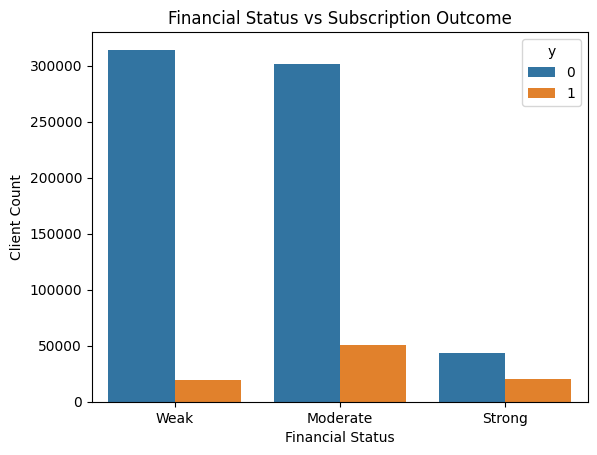

In [ ]:
sns.countplot(data=odf_train, x='financial_status', hue='y')
plt.title('Financial Status vs Subscription Outcome')
plt.xlabel('Financial Status')
plt.ylabel('Client Count')
plt.show()

In [ ]:
odf_train.groupby(by='financial_status')['y'].mean()

,y
financial_status,
Moderate,0.142925
Strong,0.320388
Weak,0.058734


In [ ]:
bins = [0, 60, 180, 300, 600, odf_train['duration'].max()]  # seconds
labels = ['<1 min', '1-3 min', '3-5 min', '5-10 min', '10+ min']

odf_train['duration_bin'] = pd.cut(odf_train['duration'], bins=bins, labels=labels, right=False)
odf_test['duration_bin'] = pd.cut(odf_test['duration'], bins=bins, labels=labels, right=False)

print(odf_train[['duration', 'duration_bin']].head())


   duration duration_bin
0       117      1-3 min
1       185      3-5 min
2       111      1-3 min
3        10       <1 min
4       902      10+ min


In [ ]:
odf_train.groupby(by='duration_bin')['y'].mean()

,y
duration_bin,
<1 min,0.003022
1-3 min,0.015651
3-5 min,0.191138
5-10 min,0.236282
10+ min,0.493139


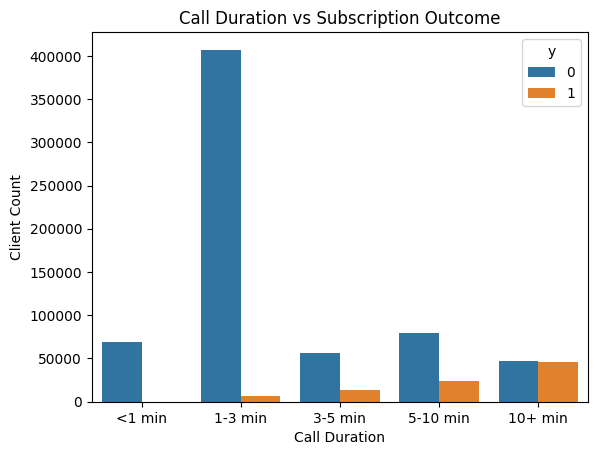

In [ ]:
sns.countplot(data=odf_train, x='duration_bin', hue='y')
plt.title('Call Duration vs Subscription Outcome')
plt.xlabel('Call Duration')
plt.ylabel('Client Count')
plt.show()

In [ ]:
def has_good_connection(row):
    score = 0

    if row['contact'] == 'cellular':
        score += 1
    if row['duration'] > 120:  # >2 minutes
        score += 1
    if row['poutcome'] == 'success':
        score += 1
    if row['pdays'] != -1 and row['pdays'] < 30:
        score += 1

    return 1 if score >= 2 else 0

In [ ]:
odf_train['has_good_connection'] = odf_train.apply(has_good_connection, axis=1)
odf_test['has_good_connection'] = odf_test.apply(has_good_connection, axis=1)

In [ ]:
odf_train.groupby(by='has_good_connection')['y'].mean()

,y
has_good_connection,
0,0.030986
1,0.273023


In [ ]:
def is_engaged_client(row):
    return 1 if row['campaign'] > 2 or row['previous'] > 1 else 0

In [ ]:
odf_train['is_engaged_client'] = odf_train.apply(is_engaged_client, axis=1)
odf_test['is_engaged_client'] = odf_test.apply(is_engaged_client, axis=1)

In [ ]:
odf_train.groupby(by='is_engaged_client')['y'].mean()

,y
is_engaged_client,
0,0.121810
1,0.118626


In [ ]:
#odf_train.drop('is_engaged_client', axis=1, inplace=True)
#odf_test.drop('is_engaged_client', axis=1, inplace=True)

In [ ]:
def recently_contacted(row):
    return 1 if row['pdays'] != -1 and row['pdays'] < 7 else 0

In [ ]:
odf_train['recently_contacted'] = odf_train.apply(recently_contacted, axis=1)
odf_test['recently_contacted'] = odf_test.apply(recently_contacted, axis=1)

In [ ]:
odf_train.groupby(by='recently_contacted')['y'].mean()

,y
recently_contacted,
0,0.120656
1,0.109661


In [ ]:
#odf_train.drop('recently_contacted', axis=1, inplace=True)
#odf_test.drop('recently_contacted', axis=1, inplace=True)

In [ ]:
def call_success_likelihood(row):
    score = 0
    if row['duration'] > 180:
        score += 1
    if row['poutcome'] == 'success':
        score += 1
    if row['contact'] == 'cellular':
        score += 1
    return score  # 0 to 3 scale

In [ ]:
odf_train['call_success_likelihood'] = odf_train.apply(recently_contacted, axis=1)
odf_test['call_success_likelihood'] = odf_test.apply(recently_contacted, axis=1)

In [ ]:
odf_train.groupby(by='call_success_likelihood')['y'].mean()

,y
call_success_likelihood,
0,0.120656
1,0.109661


In [ ]:
#odf_train.drop('call_success_likelihood', axis=1, inplace=True)
#odf_test.drop('call_success_likelihood', axis=1, inplace=True)

In [ ]:
odf_train['age_group'] = pd.cut(odf_train['age'], bins=[0, 25, 40, 60, 100], labels=['young', 'adult', 'middle', 'senior'])
odf_test['age_group'] = pd.cut(odf_test['age'], bins=[0, 25, 40, 60, 100], labels=['young', 'adult', 'middle', 'senior'])

In [ ]:
odf_train.groupby(by='age_group')['y'].mean()

,y
age_group,
young,0.269158
adult,0.120491
middle,0.095853
senior,0.514027


In [ ]:
#odf_train['client_profile'] = odf_train['age_group'].astype(str) + '_' + odf_train['job'] + '_' + odf_train['education']
#odf_test['client_profile'] = odf_test['age_group'].astype(str) + '_' + odf_test['job'] + '_' + odf_test['education']

In [ ]:
#odf_train.groupby(by='client_profile')['y'].mean().sort_values(ascending=False)

In [ ]:
#odf_train.drop('client_profile', axis=1, inplace=True)
#odf_test.drop('client_profile', axis=1, inplace=True)

In [ ]:
def map_job_group(job):
    high_signal = ['student', 'retired']
    mid_signal = ['unemployed', 'management', 'self-employed']
    avg_signal = ['unknown', 'technician', 'admin.']
    low_signal = ['housemaid', 'services', 'entrepreneur', 'blue-collar']

    if job in high_signal:
        return 'high_signal'
    elif job in mid_signal:
        return 'mid_signal'
    elif job in avg_signal:
        return 'avg_signal'
    elif job in low_signal:
        return 'low_signal'
    else:
        return 'other'  # Just in case

In [ ]:
odf_train['job_group'] = odf_train['job'].map(map_job_group)
odf_test['job_group'] = odf_test['job'].map(map_job_group)

In [ ]:
odf_train.groupby(by='job_group')['y'].mean().sort_values(ascending=False)

,y
job_group,
high_signal,0.269935
mid_signal,0.150960
avg_signal,0.117668
low_signal,0.073035


In [ ]:
#odf_train.drop('job_group', axis=1, inplace=True)
#odf_test.drop('job_group', axis=1, inplace=True)

In [ ]:
odf_train['marital_age_group'] = odf_train['age_group'].astype(str) + '_' + odf_train['marital']
odf_test['marital_age_group'] = odf_test['age_group'].astype(str) + '_' + odf_test['marital']

In [ ]:
odf_train.groupby(by='marital_age_group')['y'].mean().sort_values(ascending=False)

,y
marital_age_group,
senior_divorced,0.530889
senior_married,0.512774
senior_single,0.461095
young_single,0.291667
adult_single,0.164981
middle_single,0.130020
young_married,0.123416
middle_divorced,0.103035
adult_divorced,0.094705


In [ ]:
#odf_train.drop('marital_age_group', axis=1, inplace=True)
#odf_test.drop('marital_age_group', axis=1, inplace=True)

In [ ]:
balance_stats_by_job = odf_train.groupby('job')['balance'].mean().sort_values(ascending=False)
print(balance_stats_by_job)

job
retired          1812.071195
unknown          1678.960919
self-employed    1598.269138
student          1577.318773
management       1510.385283
unemployed       1440.574685
entrepreneur     1306.749238
housemaid        1281.220211
technician       1071.571535
admin.           1019.924582
blue-collar       977.494182
services          834.625707
Name: balance, dtype: float64


In [ ]:
odf_train.groupby(by='job')['y'].mean().sort_values(ascending=False)

,y
job,
student,0.340784
retired,0.246241
unemployed,0.179823
management,0.150392
self-employed,0.129443
unknown,0.120672
technician,0.118321
admin.,0.116453
housemaid,0.084653


In [ ]:
odf_train.shape

(750000, 26)

In [ ]:
odf_test.shape

(250000, 26)

In [ ]:
odf_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'financial_status', 'duration_bin',
       'has_good_connection', 'is_engaged_client', 'recently_contacted',
       'call_success_likelihood', 'age_group', 'job_group',
       'marital_age_group'],
      dtype='object')

In [ ]:
odf_test.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'financial_status', 'duration_bin',
       'has_good_connection', 'is_engaged_client', 'recently_contacted',
       'call_success_likelihood', 'age_group', 'job_group',
       'marital_age_group'],
      dtype='object')

In [ ]:
odf_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,financial_status,duration_bin,has_good_connection,is_engaged_client,recently_contacted,call_success_likelihood,age_group,job_group,marital_age_group
0,42,technician,married,secondary,no,7,no,no,cellular,25,...,0,Weak,1-3 min,0,1,0,0,middle,avg_signal,middle_married
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,...,0,Moderate,3-5 min,0,0,0,0,adult,low_signal,adult_married
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,...,0,Moderate,1-3 min,0,0,0,0,adult,low_signal,adult_married
3,27,student,single,secondary,no,34,yes,no,unknown,28,...,0,Weak,<1 min,0,0,0,0,adult,high_signal,adult_single
4,26,technician,married,secondary,no,889,yes,no,cellular,3,...,1,Moderate,10+ min,1,0,0,0,adult,avg_signal,adult_married


In [ ]:
odf_train[odf_train['duration_bin'].isna()]['duration_bin'] = '10+ min'
odf_test[odf_test['duration_bin'].isna()]['duration_bin'] = '10+ min'

In [ ]:
odf_train['duration_bin'].fillna('10+ min', inplace=True)
odf_test['duration_bin'].fillna('10+ min', inplace=True)

In [ ]:
X = odf_train.drop(columns=['y'])
y = odf_train['y']

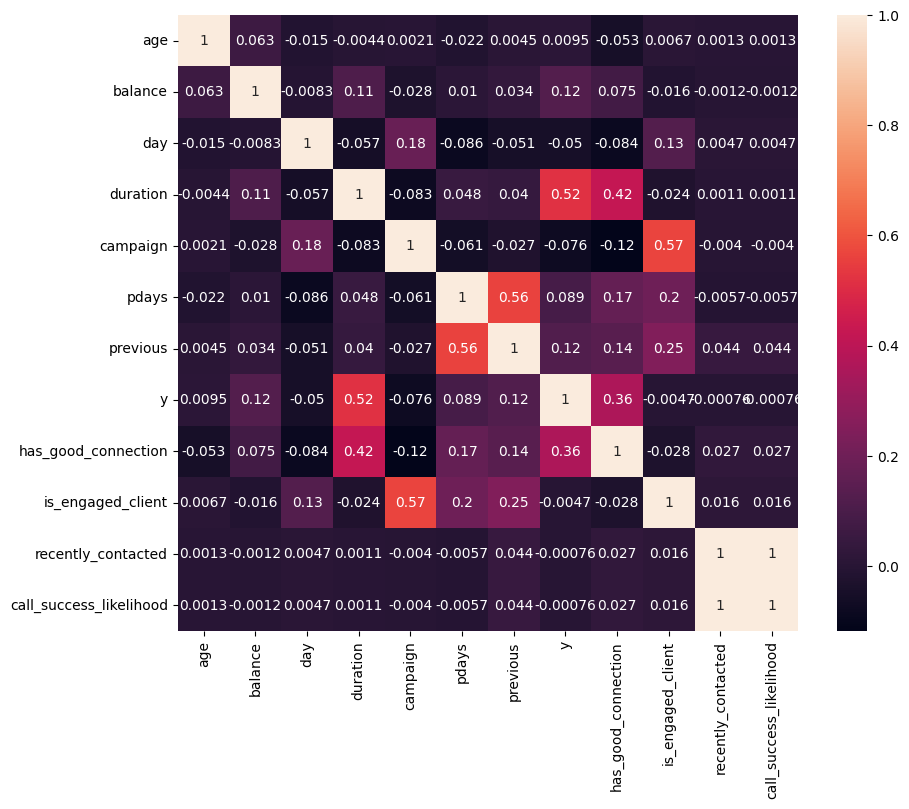

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(odf_train.corr(numeric_only=True), annot=True)
plt.show()

In [ ]:
ohe_cols = [
    'marital',
    'contact',
    'month',
    'poutcome',
    'financial_status',
    'job_group',        # if still needed separately
    'marital_age_group'
]

ord_cols = [
    'education',        # primary < secondary < tertiary
    'duration_bin',     # short < medium < long
    'age_group'         # youngest < oldest
]

ord_cols_order = [
    ['unknown', 'primary', 'secondary', 'tertiary'],
    ['<1 min', '1-3 min', '3-5 min', '5-10 min', '10+ min'],
    ['young', 'adult', 'middle', 'senior']
]

num_cols = [
    'age',
    'balance',
    'day',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'has_good_connection',
    'recently_contacted',
    'is_engaged_client',
    'call_success_likelihood'
]

In [ ]:
bdf_train.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
172001,31,services,single,secondary,no,1613,yes,no,cellular,5,feb,131,1,-1,0,unknown,0


In [ ]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'financial_status', 'duration_bin',
       'has_good_connection', 'is_engaged_client', 'recently_contacted',
       'call_success_likelihood', 'age_group', 'job_group',
       'marital_age_group'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600000, 25), (150000, 25), (600000,), (150000,))

In [ ]:
from math import remainder
preprocesing = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols),
        ('scaler', StandardScaler(), num_cols)
    ],remainder='drop' ))
])

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Pipeline
pipe_lgbm_with_fet = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', LGBMClassifier(
    learning_rate= 0.1,
    max_depth= -1,
    n_estimators= 500,
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    random_state=42,
    verbose=-1
))])

scale_pos_weight: 7.30


In [ ]:
pipe_lgbm_with_fet.fit(X_train, y_train)

Pipeline(steps=[('preprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['marital',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome',
                                                                    'financial_status',
                                                                    'job_group',
                                                                    'marital_age_group']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary'],
                                                                                              ['<1 '
                                                                                               'min',
                                                                                               '1-3 '
                                                                                               'min',
                                                                                               '3-5 '
                                                                                               'min',
                                                                                               '5-10 '
                                                                                               '...
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'balance',
                                                                    'day',
                                                                    'duration',
                                                                    'campaign',
                                                                    'pdays',
                                                                    'previous',
                                                                    'has_good_connection',
                                                                    'recently_contacted',
                                                                    'is_engaged_client',
                                                                    'call_success_likelihood'])]))])),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.300706943541358),
                                verbose=-1))])

In [ ]:
y_pred = pipe_lgbm_with_fet.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    131795
           1       0.53      0.93      0.68     18205

    accuracy                           0.89    150000
   macro avg       0.76      0.91      0.81    150000
weighted avg       0.93      0.89      0.90    150000



In [ ]:
# Pipeline
pipe_lgbm_with_fet_grid = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    random_state=42,
    verbose=-1
))])

In [ ]:
# Parameter grid (keep small for large dataset)
param_grid = {
    'classifier__n_estimators': [200, 500],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.05, 0.1]
}

In [ ]:
# Stratified KFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid Search
grid_search = GridSearchCV(
    pipe_lgbm_with_fet_grid,
    param_grid,
    cv=cv,
    scoring='f1',   # Better for imbalance
    n_jobs=-1,
    verbose=2
)


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocesing',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('onehot',
                                                                                          OneHotEncoder(drop='first'),
                                                                                          ['marital',
                                                                                           'contact',
                                                                                           'month',
                                                                                           'poutcome',
                                                                                           'financial_status',
                                                                                           'job_group',
                                                                                           'marital_age_group']),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(categories=[['...
                                                                                           'call_success_likelihood'])]))])),
                                       ('classifier',
                                        LGBMClassifier(min_child_samples=50,
                                                       num_leaves=64,
                                                       objective='binary',
                                                       random_state=42,
                                                       scale_pos_weight=np.float64(7.300706943541358),
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [-1, 10, 20],
                         'classifier__n_estimators': [200, 500]},
             scoring='f1', verbose=2)

In [ ]:
# Best results
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__n_estimators': 500}
Best F1 Score: 0.6780308750588322


In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    131795
           1       0.53      0.93      0.68     18205

    accuracy                           0.89    150000
   macro avg       0.76      0.91      0.81    150000
weighted avg       0.93      0.89      0.90    150000



In [ ]:
y_final_pred = grid_search.predict(odf_test.drop(columns=['id']))

submission_lgbm_grid = pd.DataFrame({
    'id': odf_test['id'],
    'y': y_final_pred
})

submission_lgbm_grid.to_csv('sub_base_data_lgbm_feature_grid.csv', index=False)

In [ ]:
# Pipeline
pipe_lr_with_fet = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', LogisticRegression(
        random_state=42,
        class_weight='balanced',     # Handles imbalance by weighting classes
        solver='liblinear',          # Good for small datasets and L1 regularization
        penalty='l1',                # Encourages sparsity, useful for feature selection
        C=0.5
))])

In [ ]:
pipe_lr_with_fet.fit(X_train, y_train)

Pipeline(steps=[('preprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['contact',
                                                                    'month',
                                                                    'poutcome',
                                                                    'financial_status',
                                                                    'job_group',
                                                                    'marital_age_group']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary'],
                                                                                              ['<1 '
                                                                                               'min',
                                                                                               '1-3 '
                                                                                               'min',
                                                                                               '3-5 '
                                                                                               'min',
                                                                                               '5-10 '
                                                                                               'min',
                                                                                               '10+ '...
                                                                                              ['young',
                                                                                               'adult',
                                                                                               'middle',
                                                                                               'senior']]),
                                                                   ['education',
                                                                    'duration_bin',
                                                                    'age_group']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['day',
                                                                    'campaign',
                                                                    'pdays',
                                                                    'previous',
                                                                    'has_good_connection',
                                                                    'recently_contacted',
                                                                    'is_engaged_client',
                                                                    'call_success_likelihood'])]))])),
                ('classifier',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [ ]:
y_pre = pipe_lr_with_fet.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91    131795
           1       0.44      0.91      0.60     18205

    accuracy                           0.85    150000
   macro avg       0.71      0.88      0.75    150000
weighted avg       0.92      0.85      0.87    150000



In [ ]:
rfr = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Pipeline
pipe_rfr_with_fet = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', rfr)])

In [ ]:
pipe_rfr_with_fet.fit(X_train, y_train)

Pipeline(steps=[('preprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['contact',
                                                                    'month',
                                                                    'poutcome',
                                                                    'financial_status',
                                                                    'job_group',
                                                                    'marital_age_group']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary'],
                                                                                              ['<1 '
                                                                                               'min',
                                                                                               '1-3 '
                                                                                               'min',
                                                                                               '3-5 '
                                                                                               'min',
                                                                                               '5-10 '
                                                                                               'min',
                                                                                               '10+ '
                                                                                               'min'],
                                                                                              ['young',
                                                                                               'adult',
                                                                                               'middle',
                                                                                               'senior']]),
                                                                   ['education',
                                                                    'duration_bin',
                                                                    'age_group']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['day',
                                                                    'campaign',
                                                                    'pdays',
                                                                    'previous',
                                                                    'has_good_connection',
                                                                    'recently_contacted',
                                                                    'is_engaged_client',
                                                                    'call_success_likelihood'])]))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
y_pre = pipe_rfr_with_fet.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    131795
           1       0.57      0.68      0.62     18205

    accuracy                           0.90    150000
   macro avg       0.76      0.80      0.78    150000
weighted avg       0.91      0.90      0.90    150000



In [ ]:
# Assuming y_train is your target variable
from collections import Counter

counter = Counter(y_train)
neg, pos = counter[0], counter[1]
ratio = neg / pos

xgb = XGBClassifier(
    objective='binary:logistic',     # Binary classification
    eval_metric='logloss',           # Evaluation metric
    use_label_encoder=False,         # Avoid warning
    scale_pos_weight=ratio,          # Handle imbalance (ratio = neg/pos)
    n_estimators=300,                # Number of trees
    max_depth=6,                     # Tree depth
    learning_rate=0.05,              # Step size shrinkage
    subsample=0.8,                   # Row sampling
    colsample_bytree=0.8,            # Feature sampling
    min_child_weight=3,              # Minimum sum of instance weight in a child
    gamma=0.2,                       # Minimum loss reduction to make a split
    reg_alpha=0.1,                   # L1 regularization
    reg_lambda=1,                    # L2 regularization
    random_state=42
)

In [ ]:
# Pipeline
pipe_xgb_with_fet = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', xgb)])

In [ ]:
pipe_xgb_with_fet.fit(X_train, y_train)

Pipeline(steps=[('preprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['contact',
                                                                    'month',
                                                                    'poutcome',
                                                                    'financial_status',
                                                                    'job_group',
                                                                    'marital_age_group']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary'],
                                                                                              ['<1 '
                                                                                               'min',
                                                                                               '1-3 '
                                                                                               'min',
                                                                                               '3-5 '
                                                                                               'min',
                                                                                               '5-10 '
                                                                                               'min',
                                                                                               '10+ '...
                               feature_types=None, feature_weights=None,
                               gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [ ]:
y_pre = pipe_xgb_with_fet.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92    131795
           1       0.47      0.93      0.63     18205

    accuracy                           0.87    150000
   macro avg       0.73      0.89      0.77    150000
weighted avg       0.93      0.87      0.88    150000



In [ ]:
from catboost import CatBoostClassifier

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',     # Binary classification
    eval_metric='logloss',           # Evaluation metric
    use_label_encoder=False,         # Avoid warning
    scale_pos_weight=ratio,          # Handle imbalance (ratio = neg/pos)
    n_estimators=300,                # Number of trees
    max_depth=6,                     # Tree depth
    learning_rate=0.05,              # Step size shrinkage
    subsample=0.8,                   # Row sampling
    colsample_bytree=0.8,            # Feature sampling
    min_child_weight=3,              # Minimum sum of instance weight in a child
    gamma=0.2,                       # Minimum loss reduction to make a split
    reg_alpha=0.1,                   # L1 regularization
    reg_lambda=1,                    # L2 regularization
    random_state=42
)

rfr = RandomForestClassifier(
    n_estimators=200,           # Number of trees
    max_depth=10,               # Maximum depth of each tree
    min_samples_split=5,        # Minimum samples to split a node
    min_samples_leaf=2,         # Minimum samples at a leaf node
    max_features='sqrt',        # Number of features to consider at each split
    bootstrap=True,             # Use bootstrap samples
    class_weight='balanced',    # Handle imbalance
    random_state=42             # Reproducibility
)


lgb = LGBMClassifier(
    learning_rate= 0.1,
    max_depth= -1,
    n_estimators= 500,
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    random_state=42,
    verbose=-1
)

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    verbose=0,
    random_state=42
)

lr = LogisticRegression()

In [ ]:
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('rfr', rfr),
        ('lgb', lgb),
        ('cat', cat)
    ],
    final_estimator=lr,
    cv=5,
    passthrough=True,  # Optional: pass original features to meta learner
    n_jobs=-1
)


pipe_stacked_with_fet = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', stacked_model)])

In [ ]:
pipe_stacked_with_fet.fit(X_train, y_train)

Pipeline(steps=[('preprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['contact',
                                                                    'month',
                                                                    'poutcome',
                                                                    'financial_status',
                                                                    'job_group',
                                                                    'marital_age_group']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary'],
                                                                                              ['<1 '
                                                                                               'min',
                                                                                               '1-3 '
                                                                                               'min',
                                                                                               '3-5 '
                                                                                               'min',
                                                                                               '5-10 '
                                                                                               'min',
                                                                                               '10+ '...
                                                                        min_samples_split=5,
                                                                        n_estimators=200,
                                                                        random_state=42)),
                                                ('lgb',
                                                 LGBMClassifier(min_child_samples=50,
                                                                n_estimators=500,
                                                                num_leaves=64,
                                                                objective='binary',
                                                                random_state=42,
                                                                scale_pos_weight=np.float64(7.300706943541358),
                                                                verbose=-1)),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x7afb8a2eb0d0>)],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1, passthrough=True))])

In [ ]:
y_predict = pipe_stacked_with_fet.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96    131795
           1       0.69      0.65      0.67     18205

    accuracy                           0.92    150000
   macro avg       0.82      0.80      0.81    150000
weighted avg       0.92      0.92      0.92    150000



In [ ]:
y_final_pred = pipe_stacked_with_fet.predict(odf_test.drop(columns=['id']))

submission_stacked_pd = pd.DataFrame({
    'id': odf_test['id'],
    'y': y_final_pred
})

submission_stacked_pd.to_csv('sub_stacked_feature_grid.csv', index=False)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',   # Automatically balance classes
    replacement=False,           # No replacement in sampling
    n_estimators=50,              # Number of base learners
    random_state=42,
    n_jobs=-1
)

pipe_bbc_fet = Pipeline([
    ('preprocessing', preprocesing),  # fixed typo
    ('classifier', bbc)
])

pipe_bbc_fet.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['contact',
                                                                    'month',
                                                                    'poutcome',
                                                                    'financial_status',
                                                                    'job_group',
                                                                    'marital_age_group']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary'],
                                                                                              ['<1 '
                                                                                               'min',
                                                                                               '1-3 '
                                                                                               'min',
                                                                                               '3-5 '
                                                                                               'min',
                                                                                               '5-10 '
                                                                                               'min',
                                                                                               '10+...
                                                                                               'adult',
                                                                                               'middle',
                                                                                               'senior']]),
                                                                   ['education',
                                                                    'duration_bin',
                                                                    'age_group']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['day',
                                                                    'campaign',
                                                                    'pdays',
                                                                    'previous',
                                                                    'has_good_connection',
                                                                    'recently_contacted',
                                                                    'is_engaged_client',
                                                                    'call_success_likelihood'])]))])),
                ('classifier',
                 BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                           n_estimators=50, n_jobs=-1,
                                           random_state=42))])

In [ ]:
y_predict = pipe_bbc_fet.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92    131795
           1       0.49      0.89      0.63     18205

    accuracy                           0.88    150000
   macro avg       0.74      0.88      0.78    150000
weighted avg       0.92      0.88      0.89    150000



In [ ]:
from math import remainder
preeprocesing = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols)
    ],remainder='passthrough' ))
])

In [ ]:
bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',   # Automatically balance classes
    replacement=False,           # No replacement in sampling
    n_estimators=50,              # Number of base learners
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', bbc)
])

In [ ]:
X = bdf_train.drop(columns=['y'])
y = bdf_train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(),
                                                                   ['education'])]))])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [ ]:
y_pre = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91    131795
           1       0.45      0.85      0.59     18205

    accuracy                           0.86    150000
   macro avg       0.71      0.85      0.75    150000
weighted avg       0.91      0.86      0.87    150000



In [ ]:
pipe = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', stacked_model)
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]),
                                                                   ['education'])]))])),
                ('classifi...
                                                                        min_samples_split=5,
                                                                        n_estimators=200,
                                                                        random_state=42)),
                                                ('lgb',
                                                 LGBMClassifier(min_child_samples=50,
                                                                n_estimators=500,
                                                                num_leaves=64,
                                                                objective='binary',
                                                                random_state=42,
                                                                scale_pos_weight=np.float64(7.300706943541358),
                                                                verbose=-1)),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x7afb8a2eb0d0>)],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1, passthrough=True))])

In [ ]:
y_predict = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    131795
           1       0.70      0.58      0.64     18205

    accuracy                           0.92    150000
   macro avg       0.82      0.77      0.79    150000
weighted avg       0.91      0.92      0.92    150000



In [ ]:
from sklearn.model_selection import KFold

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
numeric_cols = X.select_dtypes(include=['number']).columns

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

preeprocesing = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ],remainder='passthrough' ))
])

pipe = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', clf)
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]),
                                                                   ['education']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))]))])),
                ('classifier',
                 GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                          'penalty': ['l1', 'l2']},
                              scoring='f1_macro'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    217507
           1       0.71      0.51      0.59     29993

    accuracy                           0.92    247500
   macro avg       0.82      0.74      0.77    247500
weighted avg       0.91      0.92      0.91    247500



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[211444   6063]
 [ 14816  15177]]


In [ ]:
class_weight=dict({0:1,1:100})

In [ ]:
classifier=RandomForestClassifier(class_weight=class_weight)

In [ ]:
pipe = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', classifier)
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]),
                                                                   ['education']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))]))])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 100}))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[212258   5249]
 [ 12567  17426]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    217507
           1       0.77      0.58      0.66     29993

    accuracy                           0.93    247500
   macro avg       0.86      0.78      0.81    247500
weighted avg       0.92      0.93      0.92    247500



In [ ]:
y_final_pred = pipe.predict(bdf_test.drop(columns=['id']))

submission_weight_rfr = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

submission_weight_rfr.to_csv('sub_weight_rfr.csv', index=False)

In [ ]:
preeprocesing = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first'), ohe_cols),
        ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols)
    ],remainder='passthrough' ))
])

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Stratified K-Fold (preserves imbalance ratio)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM classifier
lgbm_clf = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    n_estimators=500,
    random_state=42,
    verbose=-1
)

# Pipeline
pipe_lgbm = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', lgbm_clf)
])


param_grid = {
    "classifier__num_leaves": [31, 64, 127],
    "classifier__min_child_samples": [20, 50, 100],
    "classifier__learning_rate": [0.1, 0.05, 0.02],
    "classifier__n_estimators": [500, 1000],
    "classifier__bagging_fraction": [0.8, 1.0],
    "classifier__feature_fraction": [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=pipe_lgbm,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid.fit(X_train, y_train)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
y_predict = pipe_lgbm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_predict)

array([[194417,  23090],
       [  2390,  27603]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    217507
           1       0.54      0.92      0.68     29993

    accuracy                           0.90    247500
   macro avg       0.77      0.91      0.81    247500
weighted avg       0.93      0.90      0.91    247500



In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
print("Before oversampling:", Counter(y))

Before oversampling: Counter({0: 659512, 1: 90488})


In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [ ]:
print("After oversampling:", Counter(y_resampled))

After oversampling: Counter({0: 659512, 1: 659512})


In [ ]:
# LightGBM classifier
lgbm_clf = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    n_estimators=500,
    random_state=42,
    verbose=-1
)

# Pipeline
pipe_lgbm = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', lgbm_clf)
])


In [ ]:
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]),
                                                                   ['education'])]))])),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.306471609223903),
                                verbose=-1))])

In [ ]:
y_pred = pipe_lgbm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[105643  26019]
 [   272 131871]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    131662
           1       0.84      1.00      0.91    132143

    accuracy                           0.90    263805
   macro avg       0.92      0.90      0.90    263805
weighted avg       0.92      0.90      0.90    263805



In [ ]:
y_final_pred = pipe_lgbm.predict(bdf_test.drop(columns=['id']))

sub_ = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred
})

sub_.to_csv('lgbm_randomoversampling_predictions_train.csv', index=False)

In [ ]:
X = bdf_train.drop(columns=['y'])
y = bdf_train['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline  # ✅ from imblearn, not sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)

# Preprocessing (NOT wrapped in its own Pipeline)
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ohe_cols),
    ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols)
], remainder='passthrough')

# LightGBM Classifier
lgbm_clf = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=64,
    min_child_samples=50,
    n_estimators=500,
    random_state=42,
    verbose=-1
)

# Pipeline: SMOTE → Preprocessing → LGBM
pipe_lgbm_smote = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', lgbm_clf)
])

# Fit
pipe_lgbm_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42, verbose=-1))])

In [ ]:
y_pred = pipe_lgbm_smote.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[128019   3776]
 [  5696  12509]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    131795
           1       0.77      0.69      0.73     18205

    accuracy                           0.94    150000
   macro avg       0.86      0.83      0.84    150000
weighted avg       0.93      0.94      0.94    150000



In [ ]:
pipe_lgbm_smote.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42, verbose=-1))])

In [ ]:
# Predict on Kaggle test set using SMOTE-trained model
y_final_pred_smote = pipe_lgbm_smote.predict(bdf_test.drop(columns=['id']))

# Create submission DataFrame
sub_smote = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred_smote
})

# Save to CSV
sub_smote.to_csv('lgbm_smote_predictions_train.csv', index=False)

-----

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Stratified K-Fold (preserves imbalance ratio)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM classifier
lgbm_clf = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    scale_pos_weight=scale_pos_weight,
    num_leaves=64,
    min_child_samples=50,
    n_estimators=500,
    random_state=42,
    verbose=-1
)

# Pipeline
pipe_lgbm = Pipeline([
    ('preeprocesing', preeprocesing),
    ('classifier', lgbm_clf)
])


param_grid = {
    "classifier__num_leaves": [31, 64, 127],
    "classifier__min_child_samples": [20, 50, 100],
    "classifier__learning_rate": [0.1, 0.05, 0.02],
    "classifier__n_estimators": [500, 1000],
    "classifier__bagging_fraction": [0.8, 1.0],
    "classifier__feature_fraction": [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=pipe_lgbm,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

In [ ]:
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('preeprocesing',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehot',
                                                                   OneHotEncoder(drop='first'),
                                                                   ['job',
                                                                    'marital',
                                                                    'default',
                                                                    'housing',
                                                                    'loan',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome']),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'primary',
                                                                                               'secondary',
                                                                                               'tertiary']]),
                                                                   ['education'])]))])),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.300706943541358),
                                verbose=-1))])

In [ ]:
# Predict on Kaggle test set using SMOTE-trained model
y_lgbm_full = pipe_lgbm.predict(bdf_test.drop(columns=['id']))

# Create submission DataFrame
sub_lgbm = pd.DataFrame({
    'id': bdf_test['id'],
    'y': y_final_pred_smote
})

# Save to CSV
sub_lgbm.to_csv('lgbm_predictions_train.csv', index=False)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from lightgbm import LGBMClassifier

# Preprocessing step
preprocessing = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ohe_cols),
    ('ordinal', OrdinalEncoder(categories=ord_cols_order), ord_cols)
], remainder='passthrough')

# Class imbalance methods
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
smoteenn = SMOTEENN(random_state=42)

# Choose method here
imbalance_method = smoteenn  # <-- change to smote, adasyn, or smoteenn

# Optional: scale_pos_weight even with oversampling
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# LGBM Classifier
lgbm_clf = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=64,
    min_child_samples=50,
    n_estimators=500,
    random_state=42,
    verbose=-1,
    scale_pos_weight=scale_pos_weight  # optional, can remove
)

# Imbalanced Pipeline
pipe_lgbm = ImbPipeline([
    ('preprocessing', preprocessing),
    ('imbalance', imbalance_method),
    ('classifier', lgbm_clf)
])


**adasyn**

In [ ]:
# Fit model
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('imbalance', ADASYN(random_state=42)),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.300706943541358),
                                verbose=-1))])

In [ ]:
# Predict
y_pred = pipe_lgbm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[117098  14697]
 [  1303  16902]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    131795
           1       0.53      0.93      0.68     18205

    accuracy                           0.89    150000
   macro avg       0.76      0.91      0.81    150000
weighted avg       0.93      0.89      0.90    150000



In [ ]:
# Save predictions for Kaggle
submission = pd.DataFrame({
    'id': bdf_test['id'],
    'y': pipe_lgbm.predict(bdf_test.drop(columns=['id']))
})
submission.to_csv('lgbm_with_adasyn_pre_final.csv', index=False)

In [ ]:
# Fit model
pipe_lgbm.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('imbalance', ADASYN(random_state=42)),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.300706943541358),
                                verbose=-1))])

In [ ]:
# Final ADASYN Kaggle submission
submission = pd.DataFrame({
    'id': bdf_test['id'],
    'y': pipe_lgbm.predict(bdf_test.drop(columns=['id']))
})

submission.to_csv('lgbm_with_adasyn_final_submission.csv', index=False)
print("✅ Submission file saved: lgbm_with_adasyn_final_submission.csv")

✅ Submission file saved: lgbm_with_adasyn_final_submission.csv


In [ ]:
# Fit model
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'primary',
                                                                              'secondary',
                                                                              'tertiary']]),
                                                  ['education'])])),
                ('imbalance', SMOTEENN(random_state=42)),
                ('classifier',
                 LGBMClassifier(min_child_samples=50, n_estimators=500,
                                num_leaves=64, objective='binary',
                                random_state=42,
                                scale_pos_weight=np.float64(7.300706943541358),
                                verbose=-1))])

In [ ]:
# Predict
y_pred = pipe_lgbm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[113353  18442]
 [   919  17286]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92    131795
           1       0.48      0.95      0.64     18205

    accuracy                           0.87    150000
   macro avg       0.74      0.90      0.78    150000
weighted avg       0.93      0.87      0.89    150000



In [ ]:
# Save predictions for Kaggle
submission = pd.DataFrame({
    'id': bdf_test['id'],
    'y': pipe_lgbm.predict(bdf_test.drop(columns=['id']))
})
submission.to_csv('✅lgbm_with_smoteenn_pre_final.csv', index=False)

In [ ]:
# Predict
y_pred = pipe_lgbm.predict(X_test)